In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [5]:
def read_file(filename):
    times = {
        "openblas" : [],
        "omp_1" : [],
        "omp_2" : [],
        "simple" : [],
        "mkl" : [],
    }
    gflops = {
        "openblas" : [],
        "omp_1" : [],
        "omp_2" : [],
        "simple" : [],
        "mkl" : [],
    }
    offset_lines = 12
    with open(filename, 'r') as f:
        for j in range (offset_lines):
            f.readline()
        for i in range(3):
            f.readline()
            f.readline()
            line = f.readline().split()
            times["openblas"].append(line[0])
            gflops["openblas"].append(line[1])
            line = f.readline().split()
            times["omp_1"].append(line[0])
            gflops["omp_1"].append(line[1])
            line = f.readline().split()
            times["omp_2"].append(line[0])
            gflops["omp_2"].append(line[1])
            line = f.readline().split()
            times["simple"].append(line[0])
            gflops["simple"].append(line[1])
            f.readline()
            f.readline()
            line = f.readline().split()
            times["mkl"].append(line[0])
            gflops["mkl"].append(line[1])
            f.readline()
            f.readline()
            f.readline()

    return times, gflops


In [14]:
def read_logs(log_fmt, threads_arr):
    res_ = []
    for n_thr in threads_arr:
        res_.append(read_file(log_fmt.format(n_thr)))
    
    keys = ["openblas", "omp_1", "omp_2", "simple", "mkl"]

    res  = {
        "openblas" : [],
        "omp_1" : [],
        "omp_2" : [],
        "simple" : [],
        "mkl" : [],
    }
    res = {
        "time" : res,
        "gflops" : copy.deepcopy(res)
    }

    for key in keys:
        for i in range(3): # iter over matrix sizes
            arr_t = []
            arr_flops = []
            for j in range(len(threads_arr)): # iter over threads
                arr_t.append(float(res_[j][0][key][i]))
                arr_flops.append(float(res_[j][1][key][i]))

            res["time"][key].append(arr_t)
            res["gflops"][key].append(arr_flops)
    
    

    return res

In [15]:
fmt = "blas_dgemm_{}.log"
threads_arr = [1, 2, 4, 8, 16]
mat_sizes = [500, 1000, 1500]
res = read_logs(fmt, threads_arr)

In [16]:
res

{'time': {'openblas': [[0.005084, 0.010947, 0.002512, 0.001565, 0.002364],
   [0.033626, 0.025833, 0.014701, 0.00836, 0.007544],
   [0.102549, 0.081241, 0.042265, 0.024675, 0.028216]],
  'omp_1': [[0.338246, 0.27384, 0.18563, 0.128779, 0.101926],
   [3.007201, 1.413588, 0.776069, 0.436763, 0.285815],
   [10.334367, 5.149566, 2.407215, 1.221481, 0.703378]],
  'omp_2': [[0.333519, 0.201722, 0.145571, 0.070137, 0.038136],
   [2.96758, 1.384791, 0.718672, 0.371733, 0.254733],
   [10.373686, 5.134262, 2.329371, 1.159199, 0.663859]],
  'simple': [[0.339, 0.337063, 0.363834, 0.339516, 0.360408],
   [3.006793, 2.743165, 2.632608, 2.597519, 2.679147],
   [10.517866, 10.04015, 8.987607, 8.8122, 8.841477]],
  'mkl': [[0.004858, 0.006503, 0.013999, 0.002159, 0.014249],
   [0.034623, 0.028527, 0.016143, 0.009397, 0.008758],
   [0.10819, 0.083284, 0.045961, 0.02575, 0.018423]]},
 'gflops': {'openblas': [[49.174491,
    22.837659,
    99.519827,
    159.698863,
    105.741062],
   [59.477804, 77.4211

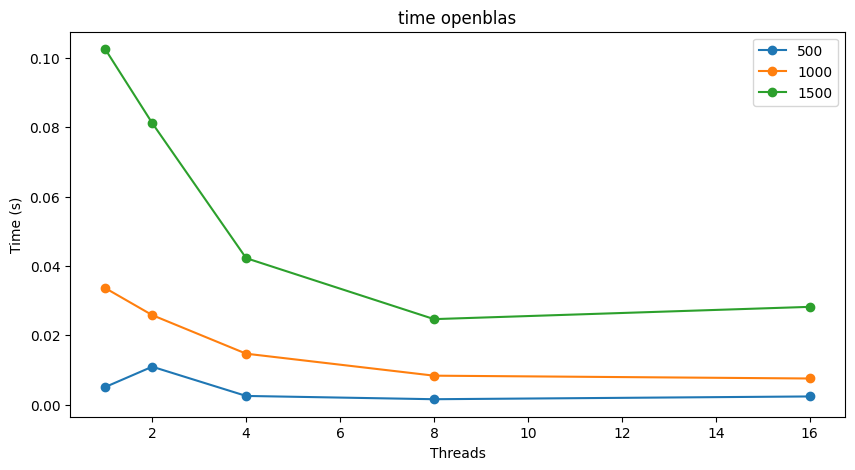

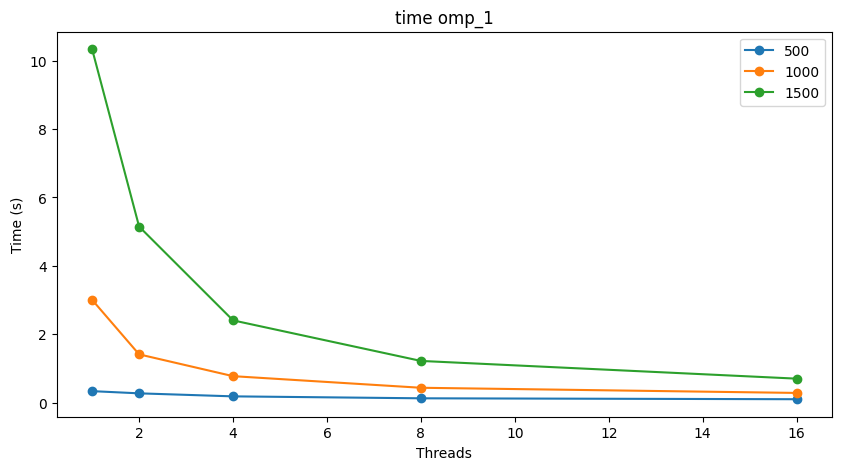

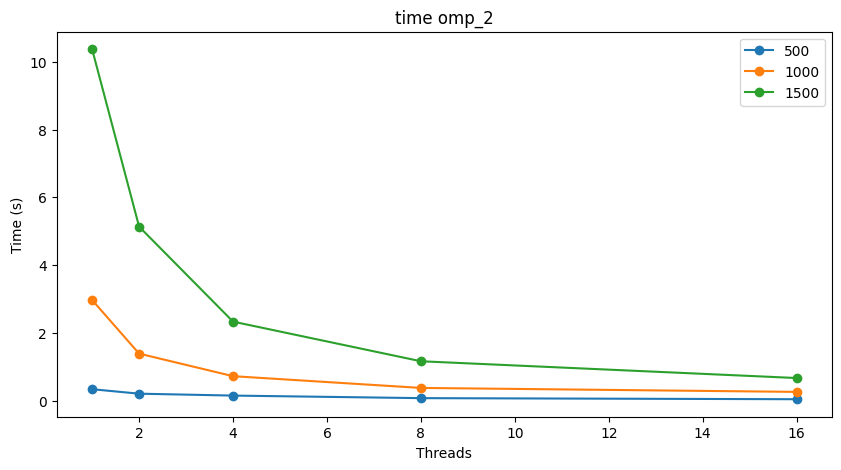

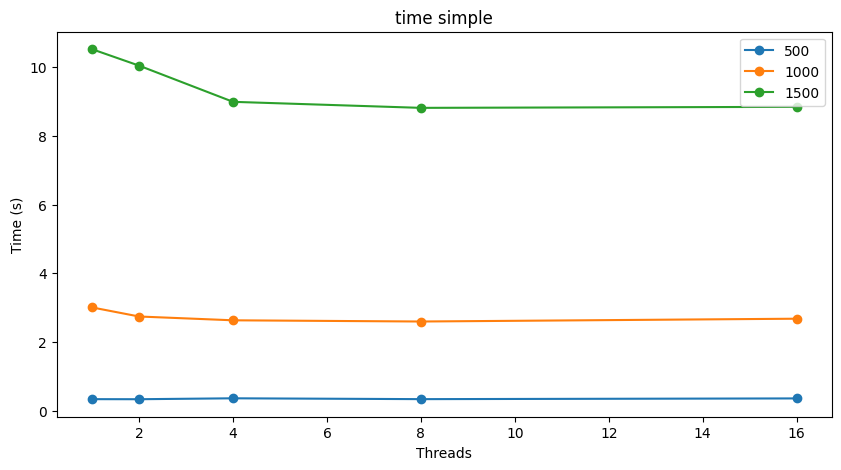

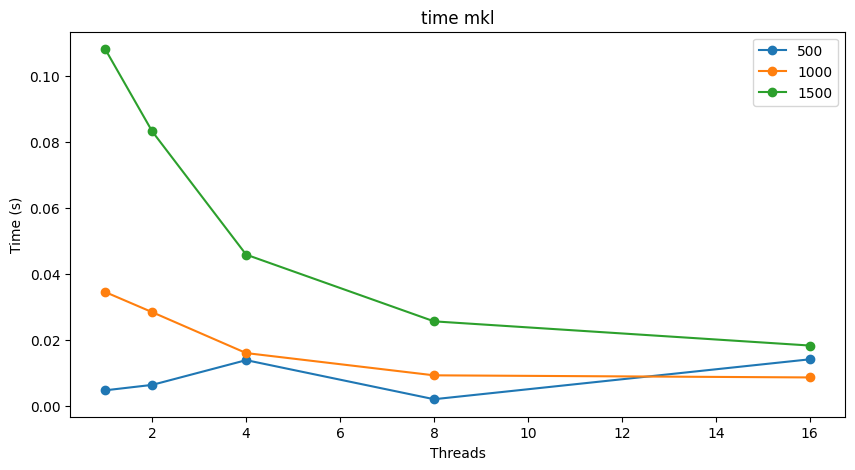

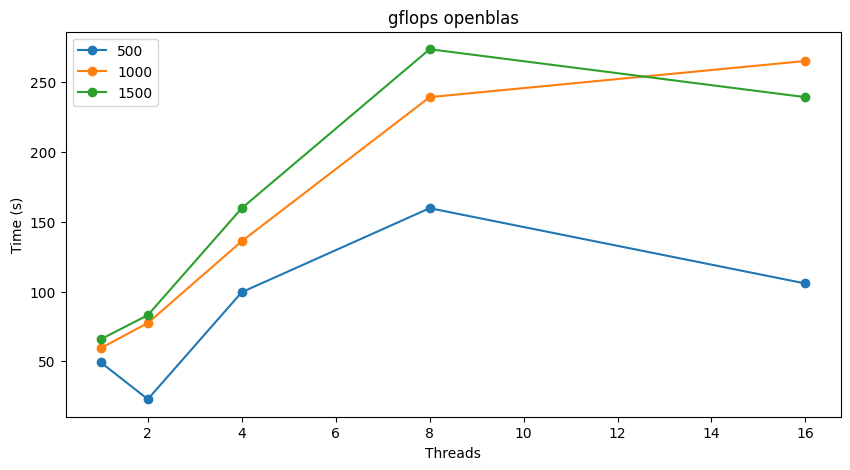

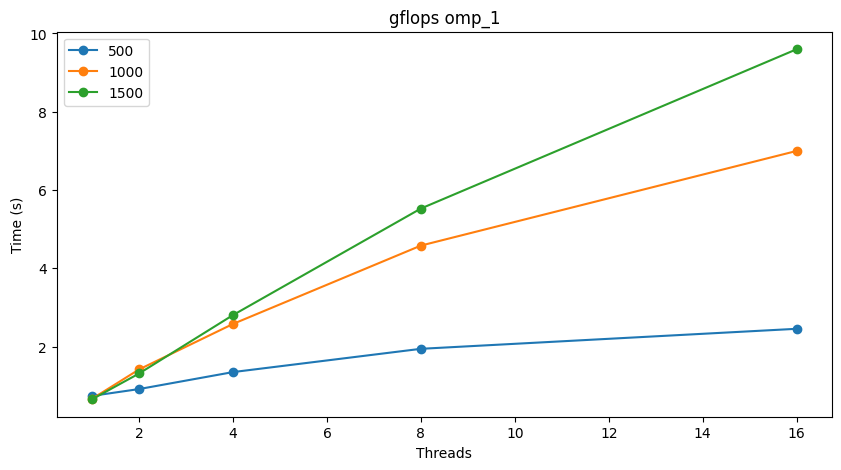

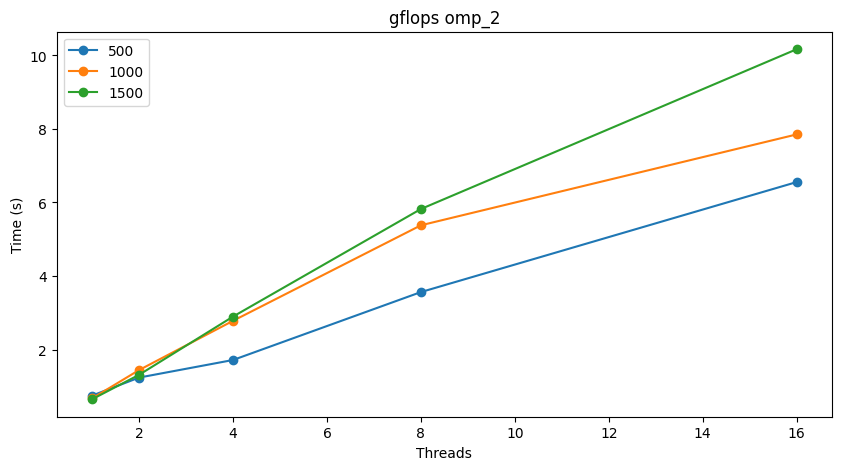

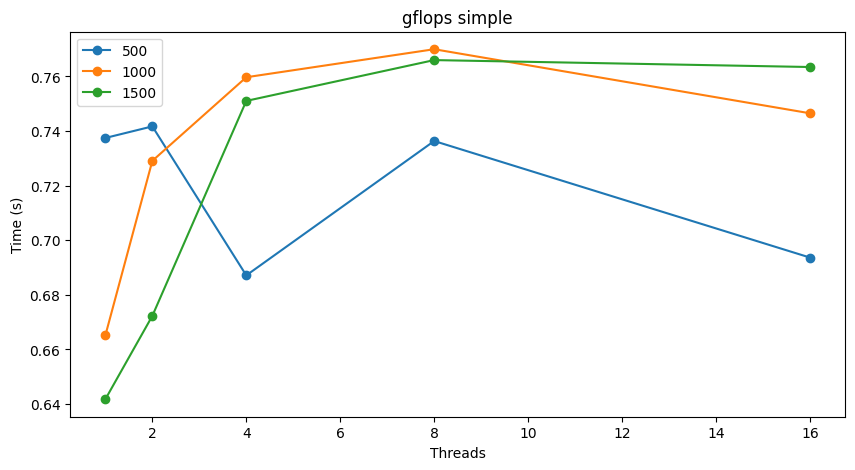

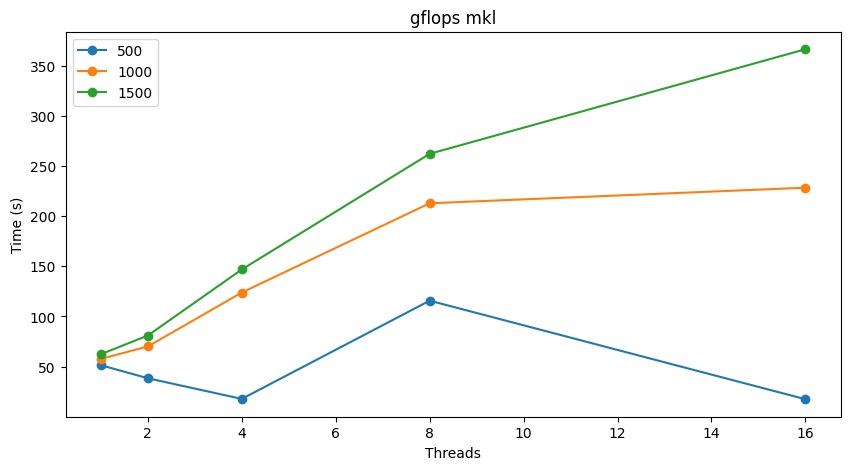

In [17]:
for title in res:
    vals_dict = res[title]
    for key in vals_dict:
        vals = vals_dict[key]
        plt.figure(figsize=(10,5))
        plt.title(title + " " + key)
        plt.xlabel("Threads")
        plt.ylabel("Time (s)")
        for i in range(len(mat_sizes)):
            plt.plot(threads_arr, vals[i], linestyle='-', marker='o',  label=mat_sizes[i])

        plt.legend(loc="best")
        plt.show()

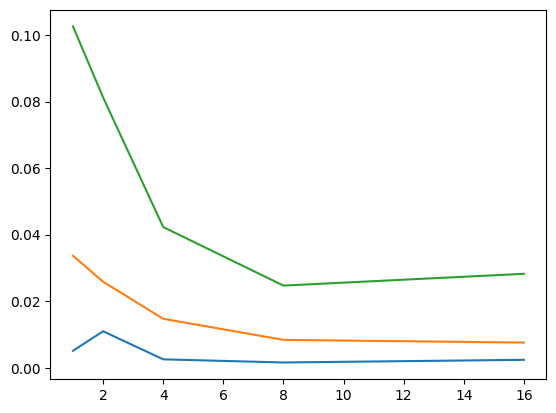

In [18]:
plt.plot(threads_arr, res["time"]["openblas"][0])
plt.plot(threads_arr, res["time"]["openblas"][1])
plt.plot(threads_arr, res["time"]["openblas"][2])

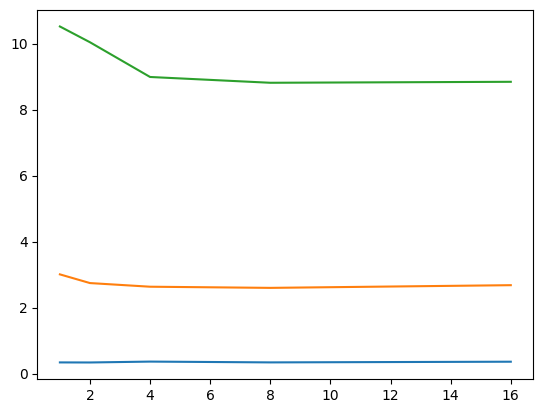

In [19]:
plt.plot(threads_arr, res["time"]["simple"][0])
plt.plot(threads_arr, res["time"]["simple"][1])
plt.plot(threads_arr, res["time"]["simple"][2])

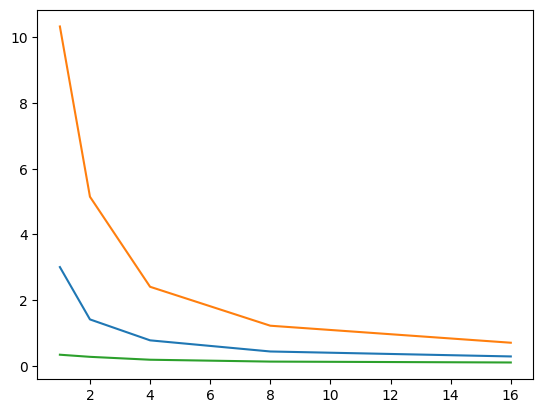

In [53]:
plt.plot(threads_arr, res["time"]["omp_1"][1])
plt.plot(threads_arr, res["time"]["omp_1"][2])
plt.plot(threads_arr, res["time"]["omp_1"][0])